<a href="https://colab.research.google.com/github/mkaushik-21/ILdata/blob/master/Advanced_algorithim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload data and packages

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IL solubilities database .xlsx to IL solubilities database .xlsx


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [3]:
import io
df= pd.read_excel(io.BytesIO(uploaded['IL solubilities database .xlsx']))
df

,IL,cation,anion,x_CO2,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],[OH],CH=CH,CH=CH2,[Im13],[MIm],[MMIM],[Py],[MPy],[MPyrro],[MPip],[NH3],[NH2],[NH],[N],[P],[S],[BF4],[Cl],[DCA],[NO3],[PF6],[SCN],[TCB],[C(CN)3],[HSO4],[FSA],[Tf2N],[BETA],[FOR],[TFA],[C3F7CO2],[MeSO4],[EtSO4],[MDEGSO4],[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
0,[BMIM][BF4],[BMIM],[BF4],0.610,363.15,246.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,[BMIM][BF4],[BMIM],[BF4],0.500,383.15,235.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,[BMIM][BF4],[BMIM],[BF4],0.610,353.15,223.30,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,[BMIM][BF4],[BMIM],[BF4],0.500,373.15,198.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[BMIM][BF4],[BMIM],[BF4],0.610,343.15,188.50,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,[HMIM][Tf2N],[HMIM],[Tf2N],0.592,298.15,35.86,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10112,[HMIM][Tf2N],[HMIM],[Tf2N],0.239,343.15,27.54,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10113,[HMIM][Tf2N],[HMIM],[Tf2N],0.396,298.15,20.15,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10114,[HMIM][Tf2N],[HMIM],[Tf2N],0.140,343.15,17.93,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['IL', 'cation', 'anion', 'x_CO2', 'T (K)', 'P (bar)', '[CH3]', '[CH2]',
       '[CH]', '[OCH2]', '[OCH3]', '[CF2]', '[CF3]', '[OH]', 'CH=CH', 'CH=CH2',
       '[Im13]', '[MIm]', '[MMIM]', '[Py]', '[MPy]', '[MPyrro]', '[MPip]',
       '[NH3]', '[NH2]', '[NH]', '[N]', '[P]', '[S]', '[BF4]', '[Cl]', '[DCA]',
       '[NO3]', '[PF6]', '[SCN]', '[TCB]', '[C(CN)3]', '[HSO4]', '[FSA]',
       '[Tf2N]', '[BETA]', '[FOR]', '[TFA]', '[C3F7CO2]', '[MeSO4]', '[EtSO4]',
       '[MDEGSO4]', '[MeSO3]', '[TfO]', '[NfO]', '[TDfO]', '[TOS]',
       '[C12PhSO3]', '[DMPO4]', '[DEPO4]', '[DBPO4]', '[methide]'],
      dtype='object')

Rename group contributions as G1, G2... Gn

In [5]:
pdf = df.rename(columns={'[CH3]': 'G1', '[CH2]': 'G2', '[CH]': 'G3', '[OCH2]': 'G4', '[OCH3]': 'G5','[CF2]': 'G6', '[CF3]': 'G7', '[OH]': 'G8', 'CH=CH': 'G9', 'CH=CH2': 'G10',
       '[Im13]': 'G11', '[MIm]': 'G12', '[MMIM]': 'G13', '[Py]': 'G14', '[MPy]': 'G15', '[MPyrro]': 'G16', '[MPip]': 'G17',
       '[NH3]': 'G18', '[NH2]': 'G19', '[NH]': 'G20', '[N]': 'G21', '[P]': 'G22', '[S]': 'G23', '[BF4]': 'G24', '[Cl]': 'G25', '[DCA]': 'G26',
       '[NO3]': 'G27', '[PF6]': 'G28', '[SCN]': 'G29', '[TCB]': 'G30', '[C(CN)3]': 'G31', '[HSO4]': 'G32', '[FSA]': 'G33',
       '[Tf2N]': 'G34', '[BETA]': 'G35', '[FOR]': 'G36', '[TFA]': 'G37', '[C3F7CO2]': 'G38', '[MeSO4]': 'G39', '[EtSO4]': 'G40',
       '[MDEGSO4]': 'G41', '[MeSO3]': 'G42', '[TfO]': 'G43', '[NfO]': 'G44', '[TDfO]': 'G45', '[TOS]': 'G46',
       '[C12PhSO3]': 'G47', '[DMPO4]': 'G48', '[DEPO4]': 'G49', '[DBPO4]': 'G50', '[methide]': 'G51' })

In [6]:
pdf.head

<bound method NDFrame.head of                  IL  cation   anion  x_CO2   T (K)  ...  G47  G48  G49  G50  G51
0       [BMIM][BF4]  [BMIM]   [BF4]  0.610  363.15  ...    0    0    0    0    0
1       [BMIM][BF4]  [BMIM]   [BF4]  0.500  383.15  ...    0    0    0    0    0
2       [BMIM][BF4]  [BMIM]   [BF4]  0.610  353.15  ...    0    0    0    0    0
3       [BMIM][BF4]  [BMIM]   [BF4]  0.500  373.15  ...    0    0    0    0    0
4       [BMIM][BF4]  [BMIM]   [BF4]  0.610  343.15  ...    0    0    0    0    0
...             ...     ...     ...    ...     ...  ...  ...  ...  ...  ...  ...
10111  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.592  298.15  ...    0    0    0    0    0
10112  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.239  343.15  ...    0    0    0    0    0
10113  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.396  298.15  ...    0    0    0    0    0
10114  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.140  343.15  ...    0    0    0    0    0
10115  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.139  323.15  ...    0    0    0    0    

Attempt at neural network

In [7]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Separate data into X and y (input and output)

In [8]:
pdf.shape

(10116, 57)

In [9]:
X= pdf[['T (K)', 'P (bar)', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14',
       'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24',
       'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31', 'G32', 'G33', 'G34',
       'G35', 'G36', 'G37', 'G38', 'G39', 'G40', 'G41', 'G42', 'G43', 'G44',
       'G45', 'G46', 'G47', 'G48', 'G49', 'G50', 'G51']]

In [10]:
y=df[['x_CO2']]

In [11]:
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y_label = pdf['x_CO2'].values.reshape(X.shape[0], 1)

#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)

#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train x is {Xtrain.shape}")
print(f"Shape of test x is {Xtest.shape}")
print(f"Shape of train y is {ytrain.shape}")
print(f"Shape of test y is {ytest.shape}")

Shape of train x is (8092, 53)
Shape of test x is (2024, 53)
Shape of train y is (8092, 1)
Shape of test y is (2024, 1)


In [12]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [ ]:
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=53, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -0.01 (0.01) MSE


In [ ]:
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(1000, input_dim=53, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=150, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
R2-score= 
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

SyntaxError: ignored

In [ ]:
import keras.models

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense

Create neural network. Second line is input and 1st hidden layer, Third line is second hidden layer, last line is output layer

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=53, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

This changes the different 'view' of neural network

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit data to the model

In [ ]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
1012/1012 [==============================] - 1s 1ms/step - loss: 0.6490 - accuracy: 0.0000e+00
Epoch 2/150
1012/1012 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.0000e+00
Epoch 3/150
1012/1012 [==============================] - 1s 1ms/step - loss: 0.5442 - accuracy: 0.0000e+00
Epoch 4/150
1012/1012 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.0000e+00
Epoch 5/150
1012/1012 [==============================] - 1s 1ms/step - loss: 0.5278 - accuracy: 0.0000e+00
Epoch 6/150
1012/1012 [==============================] - 1s 1ms/step - loss: 0.5279 - accuracy: 0.0000e+00
Epoch 7/150
1012/1012 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.0000e+00
Epoch 8/150
1012/1012 [==============================] - 1s 1ms/step - loss: 0.5207 - accuracy: 0.0000e+00
Epoch 9/150
1012/1012 [==============================] - 1s 1ms/step - loss: 0.5195 - accuracy: 0.0000e+00
Epoch 10/150
1012/1012 [=============

Use evaluation metrics, issue= accuracy is 0, something has gone wrong in neural network

In [ ]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

317/317 [==============================] - 0s 954us/step - loss: 13.0115 - accuracy: 0.0000e+00
Accuracy: 0.00


This code is supposed to predict the next five cases, error occuring

In [ ]:
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


KeyError: ignored

Attempt at random forest

In [13]:
import pandas as pd
import numpy as np

In [14]:
X

,T (K),P (bar),G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G20,G21,G22,G23,G24,G25,G26,G27,G28,G29,G30,G31,G32,G33,G34,G35,G36,G37,G38,G39,G40,G41,G42,G43,G44,G45,G46,G47,G48,G49,G50,G51
0,363.15,246.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,383.15,235.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,353.15,223.30,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,373.15,198.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,343.15,188.50,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,298.15,35.86,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10112,343.15,27.54,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10113,298.15,20.15,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10114,343.15,17.93,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
y

,x_CO2
0,0.610
1,0.500
2,0.610
3,0.500
4,0.610
...,...
10111,0.592
10112,0.239
10113,0.396
10114,0.140


Train and test split on data

In [16]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scale data based on the X values

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

Create the random forest regression model. I used a large number of trees because of the size of the data, I wanted to make sure all data was factored in.

In [18]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10000, random_state=0)
regressor.fit(X1_train, y1_train)
y1_pred = regressor.predict(X1_test)

Evaluation metrics for Random Forest

In [19]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("R2-score: %.2f" % r2_score(y1_test , y1_pred) )

Mean Absolute Error: 0.02097472231731376
Mean Squared Error: 0.0010989280790708888
Root Mean Squared Error: 0.033150084148775384
R2-score: 0.98


Create a parity figure

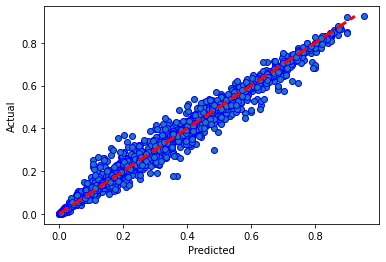

In [20]:
fig, ax = plt.subplots()
ax.scatter(y1_test,y1_pred, edgecolors=(0, 0, 1))
ax.plot([y1_pred.min(), y1_pred.max()], [y1_pred.min(), y1_pred.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Determine which features are most important for solubility

Feature: 0, Score: 0.09199
Feature: 1, Score: 0.74909
Feature: 2, Score: 0.00625
Feature: 3, Score: 0.03108
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00010
Feature: 6, Score: 0.00007
Feature: 7, Score: 0.00016
Feature: 8, Score: 0.00013
Feature: 9, Score: 0.00530
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00004
Feature: 13, Score: 0.00192
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00121
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00075
Feature: 20, Score: 0.00015
Feature: 21, Score: 0.00634
Feature: 22, Score: 0.00027
Feature: 23, Score: 0.00115
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00153
Feature: 26, Score: 0.00423
Feature: 27, Score: 0.00053
Feature: 28, Score: 0.00097
Feature: 29, Score: 0.00078
Feature: 30, Score: 0.00489
Feature: 31, Score: 0.00075
Feature: 32, Score: 0.00162
Feature: 33, Score: 0.00016
Feature: 34, Score: 0.00011
Feature: 35, Score: 0.07284
Fe

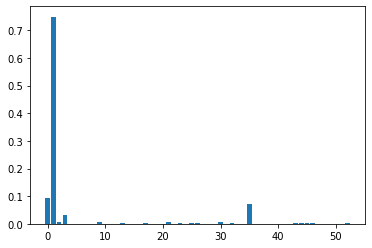

In [36]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Most important features are 1, 0, 35, and 3 which are P(bar), T(K), G33, and G2

Attempt at SVM

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

Split train/test data

In [22]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=0)

Create the Support Vector Regression Model

Scale the model to the data


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [43]:
SupportVectorRegModel = SVR()
SupportVectorRegModel.fit(X2_train, y2_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
y2_pred=SupportVectorRegModel.predict(X2_test)
y2_pred

array([0.63010458, 0.11557792, 0.31178239, ..., 0.76860819, 0.09359642,
       0.67704249])

Evaluation Metrics for SVM


In [45]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print("R2-score: %.2f" % r2_score(y2_test , y2_pred) )

Mean Absolute Error: 0.0641814264111328
Mean Squared Error: 0.006698218878894445
Root Mean Squared Error: 0.08184264706676125
R2-score: 0.88


Create a parity figure

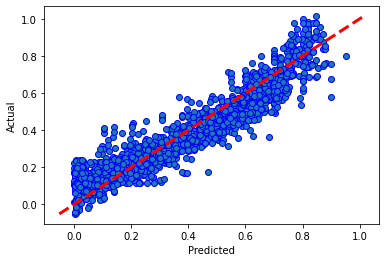

In [27]:
fig, ax = plt.subplots()
ax.scatter(y2_test,y2_pred, edgecolors=(0, 0, 1))
ax.plot([y2_pred.min(), y2_pred.max()], [y2_pred.min(), y2_pred.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [37]:
SupportVectorRegModel.kernel

'rbf'

Create SVM with linear kernel

In [46]:
SupportVectorRegModel1 = SVR(kernel='linear')
SupportVectorRegModel1.fit(X2_train, y2_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [48]:
y3_pred=SupportVectorRegModel1.predict(X2_test)
y3_pred

array([0.46497155, 0.10255198, 0.42678982, ..., 0.55589006, 0.23540018,
       0.62067402])

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y3_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y3_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y3_pred)))
print("R2-score: %.2f" % r2_score(y2_test , y3_pred) )

Mean Absolute Error: 0.11499890065400403
Mean Squared Error: 0.02153309350105607
Root Mean Squared Error: 0.14674158749671504
R2-score: 0.63


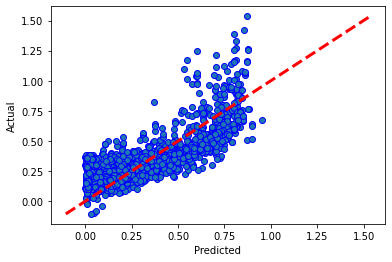

In [51]:
fig, ax = plt.subplots()
ax.scatter(y2_test,y3_pred, edgecolors=(0, 0, 1))
ax.plot([y3_pred.min(), y3_pred.max()], [y3_pred.min(), y3_pred.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()